## Titanic task
data source : https://www.kaggle.com/competitions/titanic/data

For this task i will preprocessing the titanic data and predict the Survived condition, Our aim is find the best ML model which is most fit to this data and has the highest accuracy rate.

In [1274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


### 1. Data preprocessing

In [1275]:
# load the data into a pandas dataframe called df
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable  | Definition                | Key                       |
|-----------|---------------------------|---------------------------|
|PassengerId| a unique number as id     | 0 to 891 people           |
| Survived  | Survival                  | 0 = No, 1 = Yes           |
| Pclass    | Ticket class              | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name      | Passenger name            | can be considered as unique |
| Sex       | Sex                       |                           |
| Age       | Age in years              |                           |
| Sibsp     | # of siblings / spouses aboard the Titanic |         |
| Parch     | # of parents / children aboard the Titanic |         |
| Ticket    | Ticket number             |                           |
| Fare      | Passenger fare            |                           |
| Cabin     | Cabin number              |                           |
| Embarked  | Port of Embarkation       | C = Cherbourg, Q = Queenstown, S = Southampton |


Text(0.5, 1.0, 'Survival Rate')

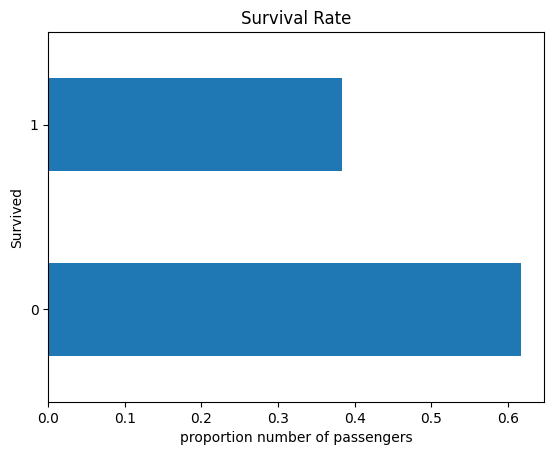

In [1276]:
train_df['Survived'].value_counts(normalize=True).plot.barh()
plt.xlabel('proportion number of passengers')
plt.title('Survival Rate')

In [1277]:
#remove columns name space avoid error
train_df.columns = train_df.columns.str.strip()

In [1278]:
# check data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1279]:
#remove columns name space avoid error
train_df.columns = train_df.columns.str.strip()

In [1280]:
# print the shape of the dataframe
train_df.shape

(891, 12)

### 2.Missing value handle

In [1281]:
# print the number of missing values
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see the missing value has 177 in Age, 687 in Cabin and 2 in embarked

In [1282]:
# for Cabin we just drop the column
train_df.drop('Cabin', axis=1, inplace=True)
# for Embarked we can just drop that 2 rows
train_df.dropna(subset=['Embarked'],how='any')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


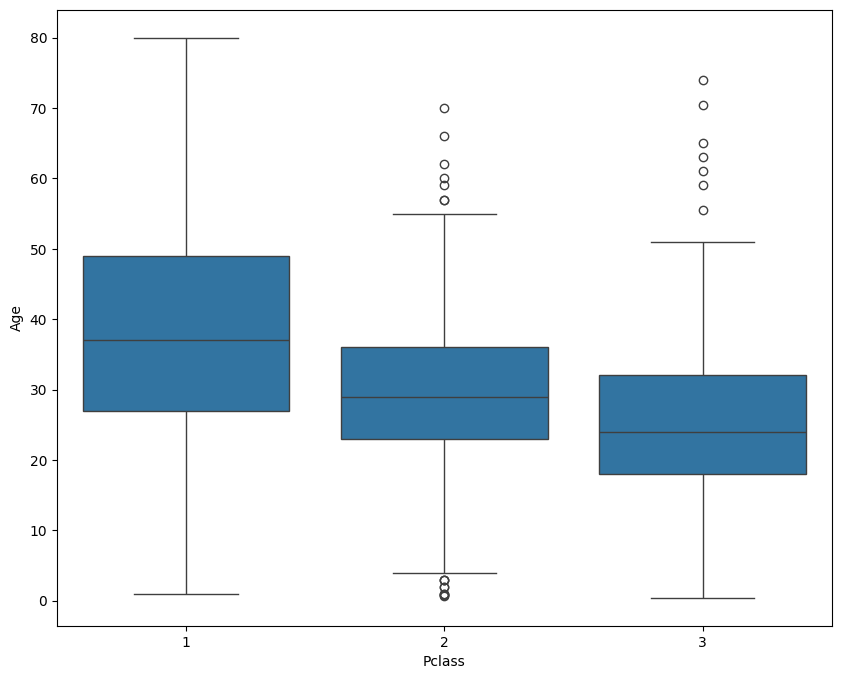

In [1283]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.show()

In [1284]:
# find age mean for each Pclass
train_df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [1285]:
#From plot we can clearly see higher level higer age, so we can replace the missing value of age depends on these 3 groups
def impute_age(row):
    Age, Pclass = row.iloc[0], row.iloc[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38 
        elif Pclass == 2:
            return 30  
        else:
            return 25 
    else:
        return Age


In [1286]:
train_df['Age'] = train_df[['Age', 'Pclass']].apply(impute_age, axis=1)


In [1287]:
# now we find relevant columns that help us for prediction (Feature Selection)
X = train_df.drop(['PassengerId','Survived','Name','Ticket'], axis=1)
y = train_df['Survived']

| Feature      | Preprocessing                                                                                             |
|--------------|-----------------------------------------------------------------------------------------------------------|
| PassengerId  | it is a unique identifier.  So we drop it                                          |
| Survived     | This is the target variable, drop it                                             |
| Pclass       | numerical data, can be used directly.                                                                  |
| Name         | the name is not very useful for prediction |
| Sex          | one-hot encoding                           |
| Age          | use directly after the missing value handled|
| SibSp & Parch| These features can be used. |
| Ticket       | Ticket numbers are complex and varied, so we drop it. |
| Fare         | Can be used directly |
| Cabin        | Has many missing values, we drop it already in last step. |
| Embarked     | one- hot encoding                                                                 |


In [1288]:
# we use one-hot encoding to convert categorical data to numerical data
X = pd.get_dummies(X, drop_first=True)

### 3. Feature selection

Now X is succeed becomes to binary True or False data

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

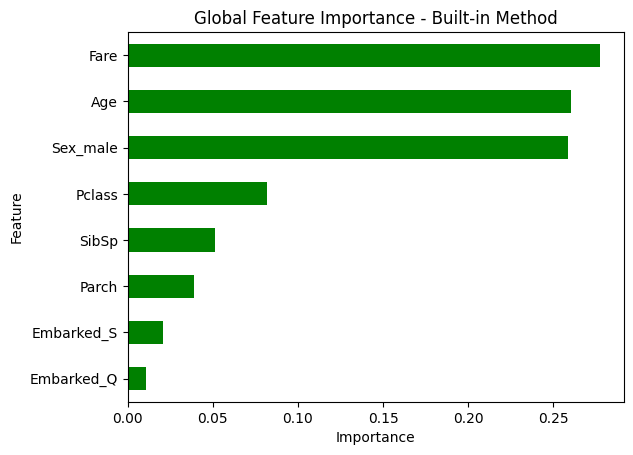

In [1289]:
# Use Random Forest Classifier to find the most important features
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X, y)
global_importances = pd.Series(rf.feature_importances_, index=X.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [1290]:
# now we drop the columns that have low importance
X.drop(['Embarked_Q', 'Embarked_S', 'Parch', 'SibSp'], axis=1, inplace=True)

### 4. Machine Learning Model 

In [1291]:
# then we split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [1292]:
X_test

,Pclass,Age,Fare,Sex_male
623,3,21.0,7.8542,True
624,3,21.0,16.1000,True
625,1,61.0,32.3208,True
626,2,57.0,12.3500,True
627,1,21.0,77.9583,False
...,...,...,...,...
886,2,27.0,13.0000,True
887,1,19.0,30.0000,False
888,3,25.0,23.4500,False
889,1,26.0,30.0000,True


In [1293]:
# we print the survival rate
print(y_train.mean())

0.39486356340288925


We can use Accuracy as the performance 


In [1294]:
# ML with Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

predictions_rf = best_grid.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(best_grid)
print(f"Accuracy score for Random Forest with optimized parameters: {accuracy_rf}")

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)
Accuracy score for Random Forest with optimized parameters: 0.8544776119402985


In [1295]:
# ML with Support Vector Machine, kernel = rbf
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

param_grid = {
    'svc__C': [0.1, 1, 10]  # Regularization parameter
}


grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)

best_svm_model = grid_search.best_estimator_
predictions_svm = best_svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f"Accuracy for Support Vector Machine with optimized parameters: {accuracy_svm:.2f}")

Accuracy for Support Vector Machine with optimized parameters: 0.83


In [1296]:
# ML with XGBoost
xgb_model = XGBClassifier()

# Define the parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_depth': [3, 5, 7], # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2] # learning rate used to prevent overfitting
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

best_xgb_model = xgb_grid_search.best_estimator_

predictions_xgb = best_xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, predictions_xgb)
print(f"Best XGB parameters: {xgb_grid_search.best_params_}")
print(f"Accuracy for XGBoost with optimized parameters: {accuracy_xgb:.2f}")


Best XGB parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Accuracy for XGBoost with optimized parameters: 0.83


In [1297]:
# ML with KNN
knn_model = KNeighborsClassifier()
# Define the parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9], # Number of neighbors
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan'] # Distance metric
}

knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

knn_grid_search.fit(X_train, y_train)

best_knn_model = knn_grid_search.best_estimator_

predictions_knn = best_knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f"Best KNN parameters: {knn_grid_search.best_params_}")
print(f"Accuracy for k-Nearest Neighbors with optimized parameters: {accuracy_knn:.2f}")


Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy for k-Nearest Neighbors with optimized parameters: 0.74


In [1298]:
# ML with Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}
log_reg_grid_search = GridSearchCV(log_reg_model, log_reg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

log_reg_grid_search.fit(X_train, y_train)
best_log_reg_model = log_reg_grid_search.best_estimator_

predictions_log_reg = best_log_reg_model.predict(X_test)

accuracy_log = accuracy_score(y_test, predictions_log_reg)
print(f"Best Logistic Regression parameters: {log_reg_grid_search.best_params_}")
print(f"Accuracy for Logistic Regression with optimized parameters: {accuracy_log:.2f}")

Best Logistic Regression parameters: {'C': 1}
Accuracy for Logistic Regression with optimized parameters: 0.80


### 5.Model Evaluation

In [1299]:
# load these accuracy into a dataframe
data = {
    'Model': ['Random Forest', 'SVM', 'XGBoost', 'KNN', 'Logistic Regression'],
    'Accuracy': [accuracy_rf, accuracy_svm, accuracy_xgb, accuracy_knn, accuracy_log]
}
accuracy_df = pd.DataFrame(data)
accuracy_df

,Model,Accuracy
0,Random Forest,0.854478
1,SVM,0.832090
2,XGBoost,0.832090
3,KNN,0.735075
4,Logistic Regression,0.798507


Text(0.5, 1.0, 'Model Accuracy')

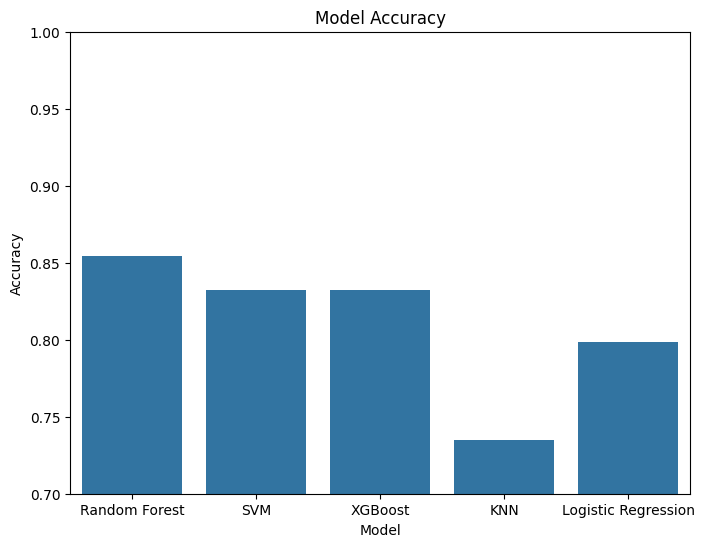

In [1300]:
# plot the accuracy of each model
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.ylim(0.7, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

now we can see the accuracy of each model, the best model is Random Forest, so we can use this model to predict the test data set.  
for future work we can use ensemble or stacking method to combine all models to get better accuracy, or we can use cross validation to get better accuracy.    
we can try handle missing values in a better way, like consider the age with sex and fare etc.  
Also for name we can select more infomation like Mr / Mrs which maybe affect the model accuracy.
